In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 

In /Users/claudia/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/claudia/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/claudia/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#defino path
path=r'/Users/claudia/Documents/CoastSat-master'
#abro doc levels estación mdp: h729.csv y arranco desde la fila del 2016-02-16 13.00 (51732)
df=pd.read_csv(path+r'/h729a.csv',header=None,names=['año','mes','dia','hora','tide'])
#convierto 32767 en NaN
df[df.tide==-32767]=np.nan
df.head()

,año,mes,dia,hora,tide
0,2004.0,11.0,15.0,0.0,2862.0
1,2004.0,11.0,15.0,1.0,2861.0
2,2004.0,11.0,15.0,2.0,2755.0
3,2004.0,11.0,15.0,3.0,2679.0
4,2004.0,11.0,15.0,4.0,2554.0


In [4]:
#convierto fechas a formato datetime, formato ISO, uso horario UTC=0 (GMT) = datos satelitales
#tiempo inicial 1er fila hasta el largo de archivo con frecuencia horaria 
a=datetime.datetime(2004,11,15,0).replace(tzinfo=datetime.timezone.utc).isoformat()
dates=pd.date_range(a,periods=len(df),freq='H')
#Saco media para llevar los niveles a 0 (tienen una referencia en la base del mareografo)
msl=np.mean(df.tide)
t=df.tide-msl
#paso de cm a m y redondeo a 3 decimales
t=(t/1000).round(3)
#convierto t en dataframe y le pongo la variable dates de indice
t=pd.DataFrame(t)
t=t.set_index(dates)
t.head()

t.to_csv('Mogotes_tide_2004a2009.csv')

/Users/claudia/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


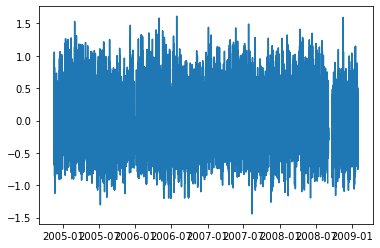

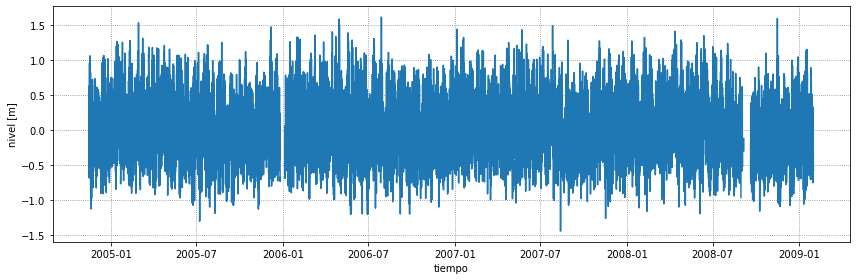

In [5]:
plt.plot(t)
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(t)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey',linestyle=':')
plt.tight_layout()
#save figure
#plt.savefig(path+r'\figura_niveles.png',dpi=300)